FJSSP

In [45]:
"""
h o h dv h f
h o h dv m f
h o h dv l f
h o m dv h f
h o m dv m f
h o m dv l f
h o l dv h f
h o l dv m f
h o l dv l f
m o h dv h f
m o h dv m f
m o h dv l f
m o m dv h f
m o m dv m f
m o m dv l f
m o l dv h f
m o l dv m f
m o l dv l f
l o h dv h f
l o h dv m f
l o h dv l f
l o m dv h f
l o m dv m f
l o m dv l f
l o l dv h f
l o l dv m f
l o l dv l f
"""

'\nh o h dv h f\nh o h dv m f\nh o h dv l f\nh o m dv h f\nh o m dv m f\nh o m dv l f\nh o l dv h f\nh o l dv m f\nh o l dv l f\nm o h dv h f\nm o h dv m f\nm o h dv l f\nm o m dv h f\nm o m dv m f\nm o m dv l f\nm o l dv h f\nm o l dv m f\nm o l dv l f\nl o h dv h f\nl o h dv m f\nl o h dv l f\nl o m dv h f\nl o m dv m f\nl o m dv l f\nl o l dv h f\nl o l dv m f\nl o l dv l f\n'

In [46]:
import ipympl
import os
path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks\all'
benchmarks = os.listdir(path)

In [47]:
import math

def calculate_flexibility(machines_for_all_operations, n_machines):
    n_operations = len(machines_for_all_operations)
    machine_sum = 0

    for m in machines_for_all_operations:
        machine_sum += len(m)

    return (machine_sum/n_operations) / n_machines

def calculate_duration_variety(durations):
    counts = []
    unique_values = []
    for d in durations:
        count = 0
        for duration in d:
            if duration > 0:
                if duration not in unique_values:
                    unique_values.append(duration)
                count+=1
        counts.append(count)

    return len(unique_values) / sum(counts)

In [48]:
from benchmark_parser import BenchmarkParser
max_f = -float('inf')
max_dv = -float('inf')
max_o = -float('inf')
min_f = float('inf')
min_dv = float('inf')
min_o = float('inf')
data = dict()
f = []
o = []
dv = []
labels = []
for benchmark in benchmarks:
    parser = BenchmarkParser()
    encoding = parser.parse_benchmark(path + '\\' + benchmark)
    data[benchmark] = {
        'name': benchmark,
        'n_operation': encoding.n_operations(),
        'flexibility': calculate_flexibility(encoding.get_machines_for_all_operations(), encoding.n_machines()),
        'duration_variety': calculate_duration_variety(encoding.durations())
    }
    f.append(data[benchmark]['flexibility'])
    o.append(data[benchmark]['n_operation'])
    dv.append(data[benchmark]['duration_variety'])
    labels.append(benchmark)
    if data[benchmark]['flexibility'] > max_f:
        max_f = data[benchmark]['flexibility']
    if data[benchmark]['flexibility'] < min_f:
        min_f = data[benchmark]['flexibility']
    if data[benchmark]['duration_variety'] > max_dv:
        max_dv = data[benchmark]['duration_variety']
    if data[benchmark]['duration_variety'] < min_dv:
        min_dv = data[benchmark]['duration_variety']
    if data[benchmark]['n_operation'] > max_o:
        max_o = data[benchmark]['n_operation']
    if data[benchmark]['n_operation'] < min_o:
        min_o = data[benchmark]['n_operation']

In [49]:
%matplotlib widget 
import matplotlib.pyplot as plt
def scatter_3d(f, o , dv):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(f, o, dv)
    ax.set_xlabel('Flexibility')
    ax.set_ylabel('# Operations')
    ax.set_zlabel('Duration Variety')

    plt.show()

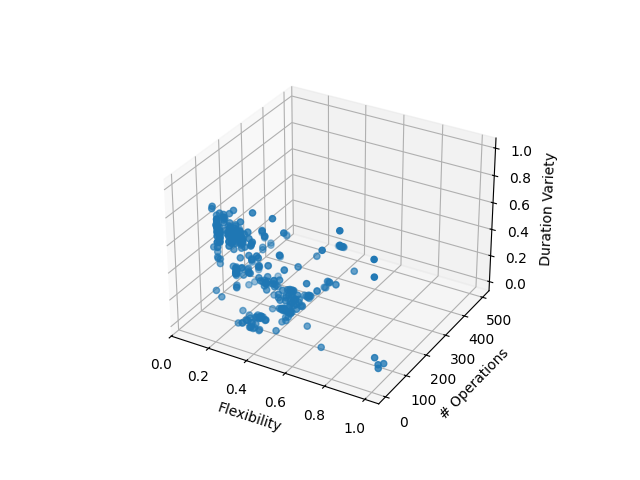

In [50]:
scatter_3d(f, o, dv)

In [51]:
min_size = 10
remove_keys = []
for key in data.keys():
    if data[key]['n_operation'] < min_size:
        remove_keys.append(key)
for key in remove_keys:
    data.pop(key)
print(f'Removed {len(remove_keys)} benchmarks')

Removed 9 benchmarks


In [52]:
max_f = -float('inf')
max_dv = -float('inf')
max_o = -float('inf')
min_f = float('inf')
min_dv = float('inf')
min_o = float('inf')
f = []
o = []
dv = []
labels = []
for benchmark in data:
    f.append(data[benchmark]['flexibility'])
    o.append(data[benchmark]['n_operation'])
    dv.append(data[benchmark]['duration_variety'])
    labels.append(benchmark)
    if data[benchmark]['flexibility'] > max_f:
        max_f = data[benchmark]['flexibility']
    if data[benchmark]['flexibility'] < min_f:
        min_f = data[benchmark]['flexibility']
    if data[benchmark]['duration_variety'] > max_dv:
        max_dv = data[benchmark]['duration_variety']
    if data[benchmark]['duration_variety'] < min_dv:
        min_dv = data[benchmark]['duration_variety']
    if data[benchmark]['n_operation'] > max_o:
        max_o = data[benchmark]['n_operation']
    if data[benchmark]['n_operation'] < min_o:
        min_o = data[benchmark]['n_operation']

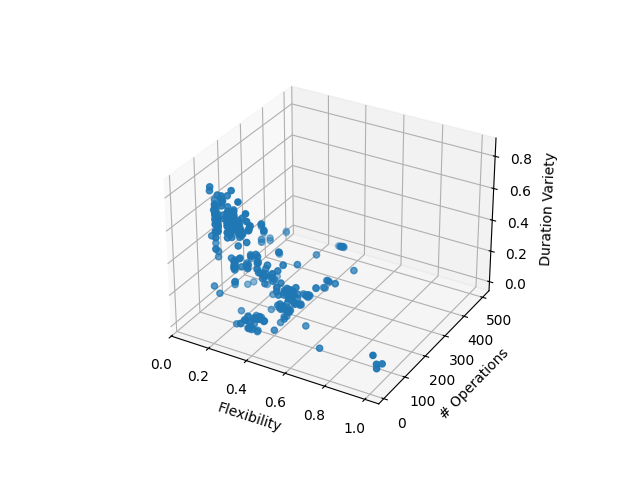

In [53]:
scatter_3d(f, o, dv)

In [54]:
f_sorted = sorted(f)
dv_sorted = sorted(dv)
o_sorted = sorted(o)
for key in data:
    benchmark = data[key]
    for i in range(len(f_sorted)):
        if benchmark['flexibility'] <= f_sorted[i] and not 'flexibility_rank' in benchmark:
            benchmark['flexibility_rank'] = i
        if benchmark['duration_variety'] <= dv_sorted[i] and not 'duration_variety_rank' in benchmark:
            benchmark['duration_variety_rank'] = i
        if benchmark['n_operation'] <= o_sorted[i] and not 'operation_rank' in benchmark:
            benchmark['operation_rank'] = i
        if 'flexibility_rank' in benchmark and 'duration_variety_rank' in benchmark and 'operation_rank' in benchmark:
            break

In [55]:
max_score = len(data) * 3
min_score = 0
mid_score = (len(data)/2) * 3

In [56]:
lowest_flexibility = sorted([data[key] for key in data], key=lambda x: x['flexibility'])
highest_flexibility = sorted([data[key] for key in data], key=lambda x: x['flexibility'], reverse=True)
lowest_duration_variety = sorted([data[key] for key in data], key=lambda x: x['duration_variety'])
highest_duration_variety = sorted([data[key] for key in data], key=lambda x: x['duration_variety'], reverse=True)
lowest_operation = sorted([data[key] for key in data], key=lambda x: x['n_operation'])
highest_operation = sorted([data[key] for key in data], key=lambda x: x['n_operation'], reverse=True)

In [57]:
equal_best_high_flexibility = [x for x in highest_flexibility if x['flexibility_rank'] == highest_flexibility[0]['flexibility_rank']]
equal_best_high_duration_variety = [x for x in highest_duration_variety if x['duration_variety_rank'] == highest_flexibility[0]['duration_variety_rank']]
equal_best_high_operation = [x for x in highest_operation if x['operation_rank'] == highest_flexibility[0]['operation_rank']]

equal_best_low_flexibility = [x for x in lowest_flexibility if x['flexibility_rank'] == 0]
equal_best_low_duration_variety = [x for x in lowest_duration_variety if x['duration_variety_rank'] == 0]
equal_best_low_operation = [x for x in lowest_operation if x['operation_rank'] == 0]

In [58]:
equal_best_low_duration_variety

[{'name': 'Behnke58.fjs',
  'n_operation': 500,
  'flexibility': 0.3249333333333333,
  'duration_variety': 0.002154288059089044,
  'duration_variety_rank': 0,
  'flexibility_rank': 264,
  'operation_rank': 378}]

In [59]:
equal_best_low_flexibility[-1]

{'name': 'HurinkSdata48.fjs',
 'n_operation': 300,
 'flexibility': 0.06666666666666667,
 'duration_variety': 0.1,
 'flexibility_rank': 0,
 'duration_variety_rank': 111,
 'operation_rank': 340}

In [60]:
import numpy as np

mean_f = np.mean(f)
mean_dv = np.mean(dv)
mean_o = np.mean(o)

median_f = np.median(f)
median_dv = np.median(dv)
median_o = np.median(o)

std_f = np.std(f)
std_dv = np.std(dv)
std_o = np.std(o)

In [61]:
mean_dv

np.float64(0.2999550879993403)

In [95]:
n_benchmarks = len(data)
max_f = np.max(f)
min_f = np.min(f)
max_dv = np.max(dv)
min_dv = np.min(dv)
max_o = np.max(o)
min_o = np.max(o)
def norm(value, max, min):
    return value/max
    diff = max - min
    return (value-min)/diff

def get_squared_distance(data, category):
    f_distance = 0
    dv_distance = 0
    o_distance = 0
    if category[0] == 'h': # flexibility
        f_distance = math.pow(n_benchmarks - data['flexibility_rank'], 2)
    elif category[0] == 'm':
        f_distance = math.pow((n_benchmarks/2) - data['flexibility_rank'], 2)
    else:
        f_distance = math.pow(data['flexibility_rank'], 2)
    if category[1] == 'h': # duration variety
        dv_distance = math.pow(n_benchmarks - data['duration_variety_rank'], 2)
    elif category[1] == 'm':
        dv_distance = math.pow((n_benchmarks/2) - data['duration_variety_rank'], 2)
    else:
        dv_distance = math.pow(data['duration_variety_rank'], 2)
    if category[2] == 'h': # operations
        o_distance = math.pow(n_benchmarks - data['operation_rank'], 2)
    elif category[2] == 'm':
        o_distance = math.pow((n_benchmarks/2) - data['operation_rank'], 2)
    else:
        o_distance = math.pow(data['operation_rank'], 2)
    return f_distance + dv_distance + o_distance


def get_squared_distance_norm(data, category):
    f_distance = 0
    dv_distance = 0
    o_distance = 0
    f_norm = norm(max_f, max_f, min_f)
    dv_norm = norm(max_dv, max_dv, min_dv)
    o_norm = norm(max_o, max_o, min_o)
    f_value = norm(data['flexibility'], max_f, min_f)
    dv_value = norm(data['duration_variety'], max_dv, min_dv)
    o_value = norm(data['n_operation'], max_o, min_o)
    if category[0] == 'h': # flexibility
        f_distance = math.pow(1.0 - f_value, 2)
    elif category[0] == 'm':
        #f_distance = math.pow(0.5 - f_value, 2)
        f_distance = math.pow(((max_f+min_f)/2) - f_value, 2)
    else:
        f_distance = math.pow(f_value, 2)
    if category[1] == 'h': # duration variety
        dv_distance = math.pow(1.0 - dv_value, 2)
    elif category[1] == 'm':
        dv_distance = math.pow(((max_dv+min_dv)/2) - dv_value, 2)
    else:
        dv_distance = math.pow(dv_value, 2)
    if category[2] == 'h': # operations
        o_distance = math.pow(1.0 - o_value, 2)
    elif category[2] == 'm':
        o_distance = math.pow(((max_o+min_o)/2) - o_value, 2)
    else:
        o_distance = math.pow(o_value, 2)
    return f_distance + dv_distance + o_distance

In [91]:
def find_balanced(data, category):
    result = []
    for key in data:
        benchmark = data[key]
        result.append([key, get_squared_distance(benchmark, category)])
    return sorted(result, key=lambda x: x[1])

def find_balanced_norm(data, category):
    result = []
    for key in data:
        benchmark = data[key]
        result.append([key, get_squared_distance_norm(benchmark, category)])
    return sorted(result, key=lambda x: x[1])

In [92]:
categories = [
    'hhh',
    'hhm',
    'hhl',
    'hmh',
    'hmm',
    'hml',
    'hlh',
    'hlm',
    'hll',
    'mhh',
    'mhm',
    'mhl',
    'mmh',
    'mmm',
    'mml',
    'mlh',
    'mlm',
    'mll',
    'lhh',
    'lhm',
    'lhl',
    'lmh',
    'lmm',
    'lml',
    'llh',
    'llm',
    'lll'
    ]
results = [find_balanced(data, category) for category in categories]
results_best = [result[0] for result in results]
both = zip(results_best, categories)

In [93]:
for result, category in both:
    print(f'{category}: {result}')

hhh: ['DPpaulli5.fjs', 78269.0]
hhm: ['HurinkRdata50.fjs', 32710.25]
hhl: ['Fattahi14.fjs', 10082.0]
hmh: ['DPpaulli9.fjs', 13910.25]
hmm: ['DPpaulli6.fjs', 6843.5]
hml: ['HurinkVdata5.fjs', 584.25]
hlh: ['DPpaulli18.fjs', 5690.0]
hlm: ['BrandimarteMk5.fjs', 10469.25]
hll: ['Kacem3.fjs', 6338.0]
mhh: ['DPpaulli1.fjs', 37499.25]
mhm: ['HurinkSdata18.fjs', 9768.5]
mhl: ['HurinkEdata8.fjs', 1331.25]
mmh: ['HurinkRdata38.fjs', 8665.5]
mmm: ['HurinkRdata28.fjs', 1508.75]
mml: ['HurinkEdata1.fjs', 5613.5]
mlh: ['Behnke60.fjs', 583.25]
mlm: ['BrandimarteMk6.fjs', 7735.5]
mll: ['Behnke42.fjs', 3425.25]
lhh: ['HurinkSdata40.fjs', 26090.0]
lhm: ['HurinkSdata28.fjs', 7373.25]
lhl: ['HurinkSdata54.fjs', 12178.0]
lmh: ['HurinkSdata38.fjs', 3652.25]
lmm: ['ChambersBarnes10.fjs', 6453.5]
lml: ['HurinkSdata1.fjs', 15802.25]
llh: ['BrandimarteMk14.fjs', 13110.0]
llm: ['BrandimarteMk12.fjs', 25030.25]
lll: ['HurinkEdata1.fjs', 43145.0]


In [96]:
results = [find_balanced_norm(data, category) for category in categories]
results_best = [result[0] for result in results]
both = zip(results_best, categories)

In [97]:
for result, category in both:
    print(f'{category}: {result}')

hhh: ['DPpaulli15.fjs', 1.1922572000752913]
hhm: ['Behnke16.fjs', 249002.44230585283]
hhl: ['Fattahi11.fjs', 0.40735234985908153]
hmh: ['DPpaulli15.fjs', 0.437110118475715]
hmm: ['Behnke16.fjs', 249001.63261104072]
hml: ['Kacem1.fjs', 0.05347540782387517]
hlh: ['DPpaulli18.fjs', 0.302438003387898]
hlm: ['Behnke58.fjs', 249001.45572142792]
hll: ['Kacem3.fjs', 0.008582698961937717]
mhh: ['HurinkSdata35.fjs', 0.7464090734332949]
mhm: ['Behnke16.fjs', 249002.02877696397]
mhl: ['Fattahi11.fjs', 0.034019016525748194]
mmh: ['DPpaulli15.fjs', 0.1896682580105987]
mmm: ['Behnke16.fjs', 249001.21908215186]
mml: ['HurinkVdata50.fjs', 0.012399620759373047]
mlh: ['Behnke58.fjs', 0.04343698346995369]
mlm: ['Behnke58.fjs', 249001.04343698348]
mll: ['HurinkVdata1.fjs', 0.0189416689807698]
lhh: ['HurinkSdata35.fjs', 0.5686312956555171]
lhm: ['Behnke60.fjs', 249002.0809225556]
lhl: ['HurinkSdata55.fjs', 0.03025571807018125]
lmh: ['DPpaulli13.fjs', 0.11712816378501006]
lmm: ['Behnke60.fjs', 249001.2656780

In [77]:
data['ChambersBarnes10.fjs']

{'name': 'ChambersBarnes10.fjs',
 'n_operation': 150,
 'flexibility': 0.1,
 'duration_variety': 0.39487179487179486,
 'flexibility_rank': 29,
 'operation_rank': 229,
 'duration_variety_rank': 264}

In [79]:
data['DPpaulli6.fjs']

{'name': 'DPpaulli6.fjs',
 'n_operation': 196,
 'flexibility': 0.5112244897959184,
 'duration_variety': 0.16966067864271456,
 'duration_variety_rank': 147,
 'operation_rank': 260,
 'flexibility_rank': 374}

FJSSP - WF

In [66]:
import os
path = r'C:\Users\huda\Documents\GitHub\scheduling_model_jrc\code\upgrades\benchmarks_with_workers'
sources = os.listdir(path)